## Importing Modules

In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import json
from bs4 import BeautifulSoup

## Import CMS Benefits_Cost_Sharing_2023

In [2]:
cms_data_1 = pd.read_csv(r'\Users\burke\Downloads/Benefits_Cost_Sharing_PUF.csv', low_memory=False)

## Review data for accuracy and completeness

In [3]:
## Use head to show available columns
print(cms_data_1.head())

   BusinessYear StateCode  IssuerId SourceName           ImportDate  \
0          2023        AK     21989       HIOS  2022-11-19 01:01:13   
1          2023        AK     21989       HIOS  2022-11-19 01:01:13   
2          2023        AK     21989       HIOS  2022-11-19 01:01:13   
3          2023        AK     21989       HIOS  2022-11-19 01:01:13   
4          2023        AK     21989       HIOS  2022-11-19 01:01:13   

  StandardComponentId             PlanId                      BenefitName  \
0      21989AK0030001  21989AK0030001-00  Routine Dental Services (Adult)   
1      21989AK0030001  21989AK0030001-00     Dental Check-Up for Children   
2      21989AK0030001  21989AK0030001-00        Basic Dental Care - Child   
3      21989AK0030001  21989AK0030001-00              Orthodontia - Child   
4      21989AK0030001  21989AK0030001-00        Major Dental Care - Child   

    CopayInnTier1 CopayInnTier2  ... IsEHB IsCovered QuantLimitOnSvc LimitQty  \
0  Not Applicable           N

In [4]:
## use info to show concise summary of data
print(cms_data_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219663 entries, 0 to 2219662
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   BusinessYear         int64  
 1   StateCode            object 
 2   IssuerId             int64  
 3   SourceName           object 
 4   ImportDate           object 
 5   StandardComponentId  object 
 6   PlanId               object 
 7   BenefitName          object 
 8   CopayInnTier1        object 
 9   CopayInnTier2        object 
 10  CopayOutofNet        object 
 11  CoinsInnTier1        object 
 12  CoinsInnTier2        object 
 13  CoinsOutofNet        object 
 14  IsEHB                object 
 15  IsCovered            object 
 16  QuantLimitOnSvc      object 
 17  LimitQty             float64
 18  LimitUnit            object 
 19  Exclusions           object 
 20  Explanation          object 
 21  EHBVarReason         object 
 22  IsExclFromInnMOOP    object 
 23  IsExclFromOonMOOP    object 
dty

In [5]:
## review for duplicate data
cms_data_1.duplicated().sum()

0

In [6]:
## check for null values
cms_data_1.isnull().sum()

BusinessYear                 0
StateCode                    0
IssuerId                     0
SourceName                   0
ImportDate                   0
StandardComponentId          0
PlanId                       0
BenefitName                  0
CopayInnTier1           503349
CopayInnTier2          1852011
CopayOutofNet           503349
CoinsInnTier1           503349
CoinsInnTier2          1852011
CoinsOutofNet           503349
IsEHB                   578607
IsCovered               126678
QuantLimitOnSvc        1612945
LimitQty               1924276
LimitUnit              1924243
Exclusions             2082783
Explanation            1536817
EHBVarReason           1674567
IsExclFromInnMOOP       390070
IsExclFromOonMOOP       389650
dtype: int64

## Number of Plans by State

In [7]:
## group the CMS data by State Code to count the number of plans, and reduce to required columns
state_plans = cms_data_1.groupby('StateCode')['PlanId'].count()

In [8]:
## Review output to ensure as expected
state_plans.head()

StateCode
AK     4889
AL    17699
AR    24231
AZ    94694
DE    10499
Name: PlanId, dtype: int64

In [159]:
## sort the data by the index
state_plans_count = state_plans.sort_index()

In [160]:
## print the full dataset to review
print(state_plans_count)

StateCode
AK      4889
AL     17699
AR     24231
AZ     94694
DE     10499
FL    192265
GA    120360
HI      6450
IA     22778
IL    134525
IN     33534
KS     44864
LA     50093
MI     83471
MO     72841
MS     28004
MT     34473
NC    125053
ND     19794
NE     57427
NH     31185
OH    123680
OK     65272
OR     27975
SC     34532
SD     21324
TN    104628
TX    334446
UT     35324
VA     52481
WI    192362
WV      9114
WY      9396
Name: PlanId, dtype: int64


<AxesSubplot:xlabel='StateCode'>

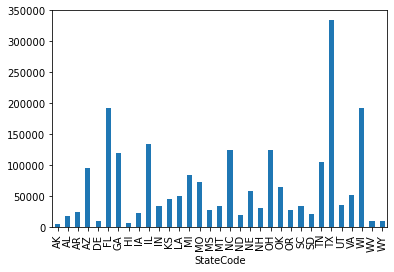

In [13]:
## plot the data on a barchart 
state_plans_count.plot(kind = 'bar')

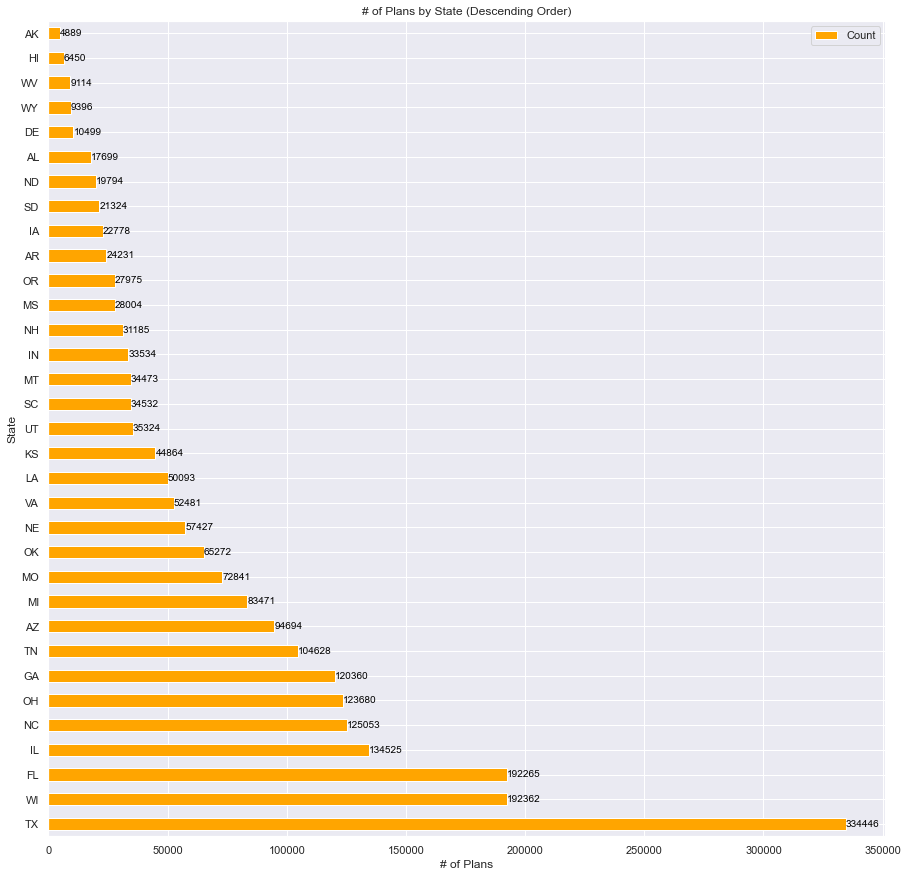

In [316]:
# data is in a Series named 'state_plans_count'
data = {
    'StateCode': state_plans_count.index,
    'Count': state_plans_count.values
}

# Convert the data to a DataFrame
state_plans_df = pd.DataFrame(data)

# Sort the DataFrame in descending order based on the 'Count' column
sorted_state_plans_df = state_plans_df.sort_values(by='Count', ascending=False)

# Create the horizontal bar chart, change colour to corporate colour
ax = sorted_state_plans_df.plot(kind='barh', x='StateCode', y='Count', color='orange')
ax.set_title("# of Plans by State (Descending Order)")
ax.set_xlabel("# of Plans")
ax.set_ylabel("State")
for p in ax.patches:
    ax.annotate(str(p.get_width()), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                va='center', fontsize=10, color='black')

plt.show()

In [15]:
## Determine the total number of Health Plans in the data set
state_plans_count.sum()

2219663

In [16]:
## Determine the highest number of plans in an individual State
state_plans_count.max()

334446

In [17]:
## Determine the lowest number of plans in an individual State
state_plans_count.min()

4889

In [18]:
## Drop columns to reduce the dataset
cms_state_plans_data_condensed = cms_data_1.drop(['BusinessYear', 'IssuerId', 'SourceName', 'ImportDate', 'StandardComponentId'], axis = 1)

In [94]:
## Print to review remaining columns
print(cms_state_plans_data_condensed.head())

  StateCode             PlanId                      BenefitName  \
0        AK  21989AK0030001-00  Routine Dental Services (Adult)   
1        AK  21989AK0030001-00     Dental Check-Up for Children   
2        AK  21989AK0030001-00        Basic Dental Care - Child   
3        AK  21989AK0030001-00              Orthodontia - Child   
4        AK  21989AK0030001-00        Major Dental Care - Child   

    CopayInnTier1 CopayInnTier2   CopayOutofNet CoinsInnTier1 CoinsInnTier2  \
0  Not Applicable           NaN  Not Applicable        20.00%           NaN   
1  Not Applicable           NaN  Not Applicable        30.00%           NaN   
2  Not Applicable           NaN  Not Applicable        70.00%           NaN   
3  Not Applicable           NaN  Not Applicable        70.00%           NaN   
4  Not Applicable           NaN  Not Applicable        70.00%           NaN   

  CoinsOutofNet IsEHB IsCovered QuantLimitOnSvc  LimitQty         LimitUnit  \
0        20.00%   NaN   Covered            

In [165]:
## Group data by State and then by Benefit type
cms_plans_state_benefit = cms_state_plans_data_condensed.groupby(['StateCode', 'BenefitName'])

In [166]:
## Review data
print(cms_plans_state_benefit.head())

        StateCode             PlanId                      BenefitName  \
0              AK  21989AK0030001-00  Routine Dental Services (Adult)   
1              AK  21989AK0030001-00     Dental Check-Up for Children   
2              AK  21989AK0030001-00        Basic Dental Care - Child   
3              AK  21989AK0030001-00              Orthodontia - Child   
4              AK  21989AK0030001-00        Major Dental Care - Child   
...           ...                ...                              ...   
2168289        WI  37833WI0380193-03                    Virtual Visit   
2168361        WI  37833WI0380193-00                    Virtual Visit   
2168426        WI  37833WI0380194-02                    Virtual Visit   
2168506        WI  37833WI0380193-01                    Virtual Visit   
2168575        WI  37833WI0380195-00                    Virtual Visit   

          CopayInnTier1 CopayInnTier2   CopayOutofNet   CoinsInnTier1  \
0        Not Applicable           NaN  Not Applica

In [170]:
## Determine most common benefit by State
most_common_benefit = cms_plans_state_benefit['BenefitName'].agg(lambda x: x.mode().iloc[0])

In [171]:
## Review most common benefit by State
print(most_common_benefit)

StateCode  BenefitName                                    
AK         Abortion for Which Public Funding is Prohibited    Abortion for Which Public Funding is Prohibited
           Accidental Dental                                                                Accidental Dental
           Acupuncture                                                                            Acupuncture
           Allergy Testing                                                                    Allergy Testing
           Bariatric Surgery                                                                Bariatric Surgery
                                                                                   ...                       
WY         Treatment for Temporomandibular Joint Disorders    Treatment for Temporomandibular Joint Disorders
           Urgent Care Centers or Facilities                                Urgent Care Centers or Facilities
           Weight Loss Programs                              

In [172]:
## Group data by Benefit type and determine most common overall benefit
cms_plans_benefit = cms_state_plans_data_condensed.groupby(['BenefitName'])
most_common_benefit_overall = cms_plans_benefit['BenefitName'].agg(lambda x: x.mode().iloc[0])
print(most_common_benefit_overall)

BenefitName
Abortion for Which Public Funding is Prohibited    Abortion for Which Public Funding is Prohibited
Accidental Dental                                                                Accidental Dental
Accidental Dental - Child                                                Accidental Dental - Child
Accidental Dental Adult                                                    Accidental Dental Adult
Active & Fit                                                                          Active & Fit
                                                                        ...                       
Well Baby Visits and Care                                                Well Baby Visits and Care
Well Child Care                                                                    Well Child Care
Well Child Care\t                                                                Well Child Care\t
Wigs                                                                                          Wig

In [175]:
## Use value counts
cms_plans_benefit['BenefitName'].value_counts().to_frame()

,,BenefitName
BenefitName,BenefitName,
Abortion for Which Public Funding is Prohibited,Abortion for Which Public Funding is Prohibited,30944
Accidental Dental,Accidental Dental,32528
Accidental Dental - Child,Accidental Dental - Child,7
Accidental Dental Adult,Accidental Dental Adult,2
Active & Fit,Active & Fit,57
...,...,...
Well Baby Visits and Care,Well Baby Visits and Care,30944
Well Child Care,Well Child Care,961
Well Child Care\t,Well Child Care\t,67


In [176]:
## Determine most common Benefit Name using 
cms_plans_benefit['BenefitName'].value_counts().idxmax()

('Accidental Dental', 'Accidental Dental')

In [312]:
## Import data from article online relating to dental benefit costs
url = 'https://www.forbes.com/advisor/health-insurance/dental-insurance/dental-work-cost/'
response = requests.get(url)
html_doc = response.text
soup = BeautifulSoup(html_doc, 'html.parser')

# Extract and print the text from paragraphs 3 to 6
paragraphs = soup.find_all('p')
for i, paragraph in enumerate(paragraphs[2:6], start=3):  # Limit to paragraphs 3 to 6
    print(f"Paragraph {i}: {paragraph.get_text()}")

Paragraph 3: Fact Checked
Paragraph 4: Updated: Aug 23, 2023, 3:01am
Paragraph 5: Going to the dentist isn’t just uncomfortable. It’s getting costlier.
Paragraph 6: Between 1996 and 2015, the cost of dental care for a single person rose 23% when adjusted for inflation, according to the Agency for Healthcare Research and Quality report. Inflation has led to even higher dental costs over the past year. The U.S. Bureau of Labor Statistics consumer price index says dental costs increased by 5.4% between October 2021 and October 2022.


# Import Rates PUF

In [20]:
## Import CMS Rates Public Use File
cms_rate_data = pd.read_csv(r'\Users\burke\Downloads/Rate_PUF.csv', low_memory=False)

In [21]:
## Review data - print to determine available columns
print(cms_rate_data.head())

   BusinessYear StateCode  IssuerId SourceName           ImportDate  \
0          2023        AK     21989       HIOS  2022-11-19 01:01:13   
1          2023        AK     21989       HIOS  2022-11-19 01:01:13   
2          2023        AK     21989       HIOS  2022-11-19 01:01:13   
3          2023        AK     21989       HIOS  2022-11-19 01:01:13   
4          2023        AK     21989       HIOS  2022-11-19 01:01:13   

  RateEffectiveDate RateExpirationDate          PlanId   RatingAreaId Tobacco  \
0        2023-10-01         2023-12-31  21989AK0110001  Rating Area 1     NaN   
1        2023-01-01         2023-03-31  21989AK0110001  Rating Area 1     NaN   
2        2023-04-01         2023-06-30  21989AK0110001  Rating Area 1     NaN   
3        2023-07-01         2023-09-30  21989AK0110001  Rating Area 1     NaN   
4        2023-07-01         2023-09-30  21989AK0110001  Rating Area 2     NaN   

             Age  IndividualRate  IndividualTobaccoRate  Couple  \
0  Family Option   

In [22]:
## use info to reivew data
print(cms_rate_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752441 entries, 0 to 2752440
Data columns (total 20 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   BusinessYear                               int64  
 1   StateCode                                  object 
 2   IssuerId                                   int64  
 3   SourceName                                 object 
 4   ImportDate                                 object 
 5   RateEffectiveDate                          object 
 6   RateExpirationDate                         object 
 7   PlanId                                     object 
 8   RatingAreaId                               object 
 9   Tobacco                                    object 
 10  Age                                        object 
 11  IndividualRate                             float64
 12  IndividualTobaccoRate                      float64
 13  Couple                                    

In [23]:
## check for duplicates
cms_rate_data.duplicated().sum()

0

In [24]:
## check for null values
cms_rate_data.isnull().sum()

BusinessYear                                       0
StateCode                                          0
IssuerId                                           0
SourceName                                         0
ImportDate                                         0
RateEffectiveDate                                  0
RateExpirationDate                                 0
PlanId                                             0
RatingAreaId                                       0
Tobacco                                          991
Age                                                0
IndividualRate                                     0
IndividualTobaccoRate                        1317760
Couple                                       2751450
PrimarySubscriberAndOneDependent             2751450
PrimarySubscriberAndTwoDependents            2751450
PrimarySubscriberAndThreeOrMoreDependents    2751450
CoupleAndOneDependent                        2751450
CoupleAndTwoDependents                       2

In [25]:
## Convert rate data to list
cms_rate_data_list = cms_rate_data['StateCode'].tolist()

In [26]:
## Condense data to columns required
cms_rate_data_condensed = cms_rate_data.drop(['BusinessYear', 'IssuerId', 'SourceName', 'ImportDate', 'RateEffectiveDate', 'RateExpirationDate', 'RatingAreaId'], axis = 1)

In [27]:
## Review column drop
print(cms_rate_data_condensed.head())

  StateCode          PlanId Tobacco            Age  IndividualRate  \
0        AK  21989AK0110001     NaN  Family Option           76.59   
1        AK  21989AK0110001     NaN  Family Option           73.82   
2        AK  21989AK0110001     NaN  Family Option           74.74   
3        AK  21989AK0110001     NaN  Family Option           75.66   
4        AK  21989AK0110001     NaN  Family Option           71.88   

   IndividualTobaccoRate  Couple  PrimarySubscriberAndOneDependent  \
0                    NaN  159.30                            183.81   
1                    NaN  153.54                            177.16   
2                    NaN  155.46                            179.38   
3                    NaN  157.38                            181.59   
4                    NaN  149.51                            172.51   

   PrimarySubscriberAndTwoDependents  \
0                             183.81   
1                             177.16   
2                             179.38  

In [285]:
## Calculate the mean per column
columns_to_analyze = ['IndividualRate', 'IndividualTobaccoRate', 'Couple', 'PrimarySubscriberAndOneDependent',
                      'PrimarySubscriberAndTwoDependents', 'PrimarySubscriberAndThreeOrMoreDependents',
                      'CoupleAndOneDependent', 'CoupleAndTwoDependents', 'CoupleAndThreeOrMoreDependents']
data_array = cms_rate_data_condensed[columns_to_analyze].to_numpy()
column_means = np.nanmean(data_array, axis=0)
mean_table = pd.DataFrame({'Column': columns_to_analyze, 'Mean': column_means})
print("Mean Table:")
print(mean_table)

Mean Table:
                                      Column        Mean
0                             IndividualRate  449.423672
1                      IndividualTobaccoRate  718.372729
2                                     Couple   65.560555
3           PrimarySubscriberAndOneDependent   78.017982
4          PrimarySubscriberAndTwoDependents   92.397518
5  PrimarySubscriberAndThreeOrMoreDependents   92.584097
6                      CoupleAndOneDependent  120.917064
7                     CoupleAndTwoDependents  121.097588
8             CoupleAndThreeOrMoreDependents  121.274077


In [284]:
# Calculate the most common rate for each column
most_common_rates = []
for column_index in range(data_array.shape[1]):
    column = data_array[:, column_index]
    unique_values, counts = np.unique(column, return_counts=True)
    most_common_rate = unique_values[np.argmax(counts)]
    most_common_rates.append(most_common_rate)
common_rate_table = pd.DataFrame({'Column': columns_to_analyze, 'Most_Common_Rate': most_common_rates})
print("\nMost Common Rate Table:")
print(common_rate_table)


Most Common Rate Table:
                                      Column  Most_Common_Rate
0                             IndividualRate              0.00
1                      IndividualTobaccoRate            507.21
2                                     Couple             71.76
3           PrimarySubscriberAndOneDependent             36.19
4          PrimarySubscriberAndTwoDependents             36.19
5  PrimarySubscriberAndThreeOrMoreDependents             36.19
6                      CoupleAndOneDependent             51.99
7                     CoupleAndTwoDependents             51.99
8             CoupleAndThreeOrMoreDependents             51.99


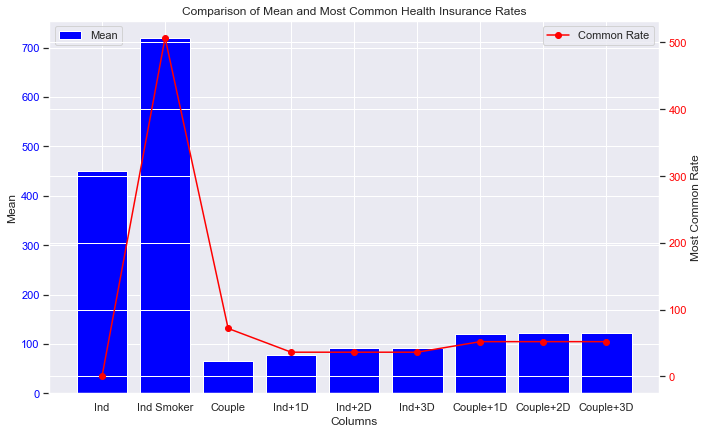

In [302]:
## Plot a graph of the two tables against each other mean vs most common rate
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(mean_table['Column'], mean_table['Mean'], color='blue', label='Mean')
ax1.set_xlabel('Columns')
ax1.set_ylabel('Mean')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(common_rate_table['Column'], common_rate_table['Most_Common_Rate'], color='red', marker='o', label='Common Rate')
ax2.set_ylabel('Most Common Rate')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Rename x-axis labels and rotate by 90 degrees
custom_labels = ['Ind', 'Ind Smoker', 'Couple', 'Ind+1D', 'Ind+2D', 'Ind+3D', 'Couple+1D', 'Couple+2D', 'Couple+3D']
plt.xticks(mean_table['Column'], custom_labels, rotation=90)

fig.tight_layout()
plt.title('Comparison of Mean and Most Common Health Insurance Rates')
plt.show()

In [28]:
## Group data by State, Smoker status and Age, calculate mean, median, min and max
cms_rate_data_condensed.groupby(['StateCode', 'Tobacco', 'Age']).agg(['mean','median', 'min', 'max'])

IndividualRate            \
                                                              mean    median   
StateCode Tobacco                       Age                                    
AK        No Preference                 0-14            204.175349    63.000   
                                        15              220.405581    63.000   
                                        16              226.475349    63.000   
                                        17              232.568372    63.000   
                                        18              239.033488    63.000   
...                                                            ...       ...   
WY        Tobacco User/Non-Tobacco User 60             1636.230556  1634.080   
                                        61             1694.108148  1691.880   
                                        62             1732.089444  1729.815   
                                        63             1779.717222  1777.380   
                                        64 and over    1808.645741  1806.270   

                                                                       \
                                                         min      max   
StateCode Tobacco                       Age                             
AK        No Preference                 0-14           35.75   466.00   
                                        15             36.82   507.00   
                                        16             36.82   523.00   
                                        17             36.82   539.00   
                                        18             36.82   556.00   
...                                                      ...      ...   
WY        Tobacco User/Non-Tobacco User 60           1244.47  1969.34   
                                        61           1288.49  2039.00   
                                        62           1317.37  2084.71   
                                        63           1353.60  2142.04   
                                        64 and over  1375.60  2176.86   

                                                    IndividualTobaccoRate  \
                                                                     mean   
StateCode Tobacco                       Age                                 
AK        No Preference                 0-14                          NaN   
                                        15                            NaN   
                                        16                            NaN   
                                        17                            NaN   
                                        18                            NaN   
...                                                                   ...   
WY        Tobacco User/Non-Tobacco User 60                    2045.287963   
                                        61                    2117.633333   
                                        62                    2165.110556   
                                        63                    2224.645556   
                                        64 and over           2260.807778   

                                                                        \
                                                       median      min   
StateCode Tobacco                       Age                              
AK        No Preference                 0-14              NaN      NaN   
                                        15                NaN      NaN   
                                        16                NaN      NaN   
                                        17                NaN      NaN   
                                        18                NaN      NaN   
...                                                       ...      ...   
WY        Tobacco User/Non-Tobacco User 60           2042.600  1555.58   
                                        61           2114.855  1610.61   
               

In [29]:
## Refine data to individual rates
cms_rate_data_individual = cms_rate_data_condensed[['StateCode', 'Tobacco', 'Age', 'IndividualRate', 'IndividualTobaccoRate']]

In [30]:
## Review individual data
print(cms_rate_data_individual.head())

  StateCode Tobacco            Age  IndividualRate  IndividualTobaccoRate
0        AK     NaN  Family Option           76.59                    NaN
1        AK     NaN  Family Option           73.82                    NaN
2        AK     NaN  Family Option           74.74                    NaN
3        AK     NaN  Family Option           75.66                    NaN
4        AK     NaN  Family Option           71.88                    NaN


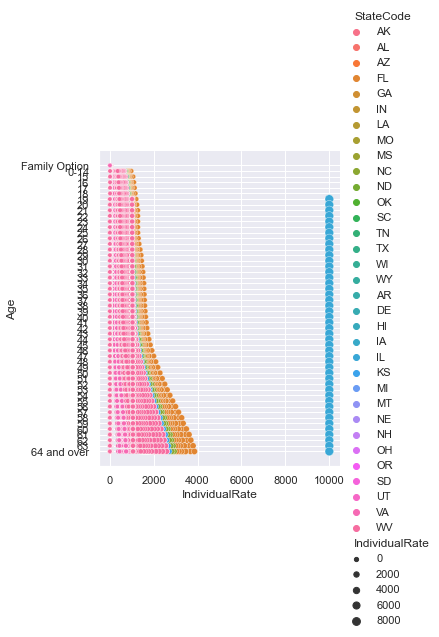

In [289]:
## Use seaborn to create a scatterplot to show if there is a relationship between age and health insurance rate
sns.relplot(x = "IndividualRate", y = "Age", data = cms_rate_data_individual, kind = "scatter", size = "IndividualRate", hue = "StateCode")

In [52]:
## remove outlier to make data easier to review
cms_rate_data_individual_outlier_removed = cms_rate_data_individual[cms_rate_data_individual['IndividualRate'] <= 4500]

In [53]:
## Review removal of outlier
cms_rate_data_individual_outlier_removed.tail()

,StateCode,Tobacco,Age,IndividualRate,IndividualTobaccoRate
2752436,WV,No Preference,63,1063.0,NaN
2752437,WV,No Preference,64 and over,1064.0,NaN
2752438,WV,No Preference,64 and over,1064.0,NaN
2752439,WV,No Preference,64 and over,1064.0,NaN
2752440,WV,No Preference,64 and over,1064.0,NaN


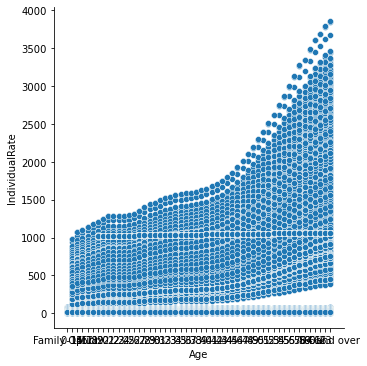

In [54]:
## Reperform scatterplot
sns.relplot(x = "Age", y = "IndividualRate", data = cms_rate_data_individual_outlier_removed, kind = "scatter")
plt.show()

In [80]:
##Refine data for individual and State of Arizona only
cms_rate_data_individual_over_50_AZ = cms_rate_data_individual_outlier_removed[(cms_rate_data_individual_outlier_removed['Age'] >= '50') & (cms_rate_data_individual_outlier_removed['StateCode'] == 'AZ') & (cms_rate_data_individual_outlier_removed['Age'] != 'Family Option')& (cms_rate_data_individual_outlier_removed['IndividualRate'] >= 100)]

In [81]:
## Check refinement
cms_rate_data_individual_over_50_AZ.head()

,StateCode,Tobacco,Age,IndividualRate,IndividualTobaccoRate
65146,AZ,Tobacco User/Non-Tobacco User,50,468.76,510.94
65147,AZ,Tobacco User/Non-Tobacco User,51,489.49,533.54
65148,AZ,Tobacco User/Non-Tobacco User,52,512.32,558.43
65149,AZ,Tobacco User/Non-Tobacco User,53,535.42,583.61
65150,AZ,Tobacco User/Non-Tobacco User,54,560.36,610.79


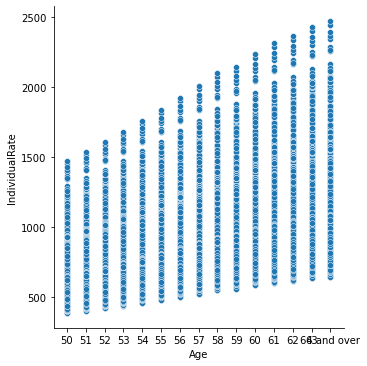

In [73]:
## Create scatterplot
sns.relplot(x = "Age", y = "IndividualRate", data = cms_rate_data_individual_over_50_AZ, kind = "scatter")
plt.show()

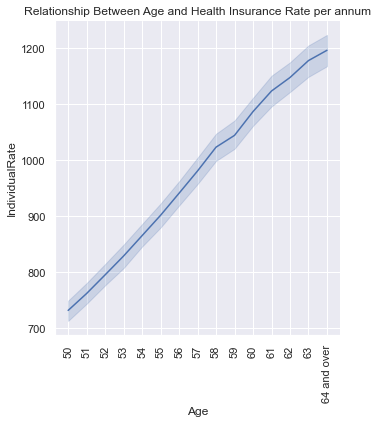

In [305]:
## Create line chart to determine if relationship between age and health insurance rate
sns.relplot(x = "Age", y = "IndividualRate", data = cms_rate_data_individual_over_50_AZ, kind = "line")
plt.title("Relationship Between Age and Health Insurance Rate per annum")
plt.xticks(rotation=90)
plt.show()

In [188]:
## Refine selection for health insurance rates for smoker in AZ and aged over 50
cms_rate_data_individual_over_50_AZ_smoker = cms_rate_data_individual_over_50_AZ[["Age", "IndividualRate", "IndividualTobaccoRate"]]

In [216]:
## Review data for Arizona and individual aged over 50
cms_smoker_graph_data = cms_rate_data_individual_over_50_AZ_smoker.groupby('Age').mean()
print(cms_smoker_graph_data)

             IndividualRate  IndividualTobaccoRate
Age                                               
50               731.383635             817.019107
51               761.603451             853.157934
52               794.878526             892.956224
53               828.535762             933.212066
54               864.866616             976.670536
55               901.197437            1034.801378
56               940.583534            1082.596709
57               980.351876            1130.856378
58              1022.793333            1182.364490
59              1043.846466            1207.885842
60              1086.288375            1259.393520
61              1123.001022            1303.941097
62              1147.109765            1333.175102
63              1177.329765            1369.833878
64 and over     1195.673618            1392.047245


In [136]:
## Calculate the mean rate per State from original data
cms_rate_data_individual_by_state = cms_rate_data_individual_outlier_removed.groupby(['StateCode']).agg(['mean'])

In [137]:
## Review data
cms_rate_data_individual_by_state.tail()

,IndividualRate,IndividualTobaccoRate
,mean,mean
StateCode,,
UT,483.561666,681.294087
VA,312.527618,515.638387
WI,596.938378,686.124952
WV,875.844819,1105.550906
WY,566.459533,1139.082237


In [261]:
## Use iterrows to review data by State for individual rate for smokers versus nonsmokers
for lab, row in cms_rate_data_individual_by_state.iterrows():
    print(lab)
    print(row)

AK
IndividualRate         mean    518.885873
IndividualTobaccoRate  mean    870.772433
Name: AK, dtype: float64
AL
IndividualRate         mean    395.624433
IndividualTobaccoRate  mean    760.404994
Name: AL, dtype: float64
AR
IndividualRate         mean    436.066916
IndividualTobaccoRate  mean    658.684318
Name: AR, dtype: float64
AZ
IndividualRate         mean    481.639036
IndividualTobaccoRate  mean    692.644153
Name: AZ, dtype: float64
DE
IndividualRate         mean    457.867684
IndividualTobaccoRate  mean    732.555229
Name: DE, dtype: float64
FL
IndividualRate         mean    499.965249
IndividualTobaccoRate  mean    807.338424
Name: FL, dtype: float64
GA
IndividualRate         mean    454.263647
IndividualTobaccoRate  mean    588.817564
Name: GA, dtype: float64
HI
IndividualRate         mean    306.048814
IndividualTobaccoRate  mean    645.090936
Name: HI, dtype: float64
IA
IndividualRate         mean    384.135597
IndividualTobaccoRate  mean    621.493487
Name: IA, dtype: 

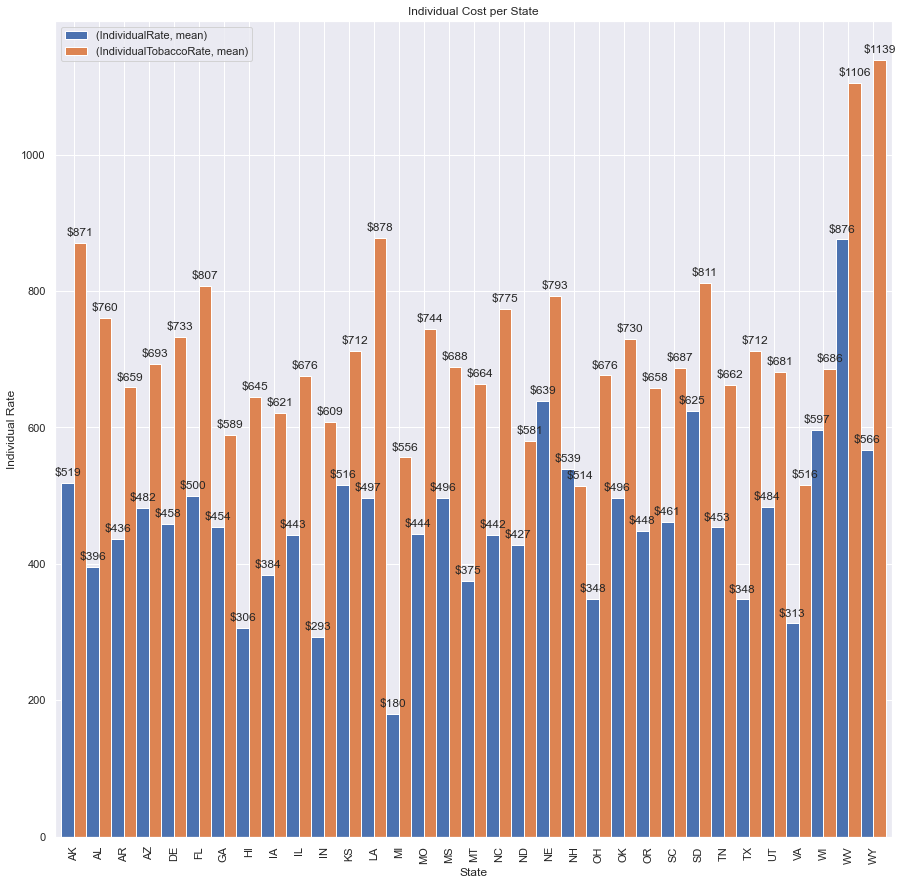

In [287]:
## Plot the health insurance rates for smokers and nonsmokers in a bar chart to visualise for all States if smokers pay a higher rate
plt.rcParams['figure.figsize'] = (15, 15)
ax = cms_rate_data_individual_by_state.plot(kind = 'bar', width = 1)
ax.set_title("Individual Cost per State")
ax.set_xlabel("State")
ax.set_ylabel("Individual Rate")
plt.legend()
for p in ax.patches:
    height = p.get_height()
    ax.annotate('${}'.format(round(height)),  # Round to nearest dollar
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
plt.show()

## Import Median Income per State data

In [31]:
## Import file
median_income = requests.get('https://worldpopulationreview.com/state-rankings/median-household-income-by-state')
type(median_income)

requests.models.Response

In [32]:
requests.get('https://worldpopulationreview.com/state-rankings/median-household-income-by-state')

<Response [200]>

In [33]:
median_income.status_code

200

In [271]:
from urllib.request import urlretrieve
url = 'https://worldpopulationreview.com/state-rankings/median-household-income-by-state'
urlretrieve(url, 'median-household-income-by-state-[updated-august-2023].csv' )

('median-household-income-by-state-[updated-august-2023].csv',
 <http.client.HTTPMessage at 0x232795e2d90>)

In [269]:
## Import median household income by State
median_income_data = pd.read_csv(r'\Users\burke\Downloads/median-household-income-by-state-[updated-august-2023].csv')

In [272]:
## Review data
print(median_income_data.head())
median_income_data.duplicated().sum()
median_income_data.isnull().sum()

                  state  medianHouseholdIncome2021
0              Maryland                      90203
1  District of Columbia                      90088
2         Massachusetts                      89645
3            New Jersey                      89296
4         New Hampshire                      88465


state                        0
medianHouseholdIncome2021    0
dtype: int64

## Use dictionary of US States to create a column in median income data with 2 letter abbreviation

In [96]:
## Import dictionary of State abbreviations
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [97]:
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

In [101]:
## Convert dictionary to dataframe to enable merging
state_list = pd.DataFrame(abbrev_to_us_state.items(), columns=['state_code','state_name'])

In [102]:
## Review dataframe
state_list.head()

,state_code,state_name
0,AL,Alabama
1,AK,Alaska
2,AZ,Arizona
3,AR,Arkansas
4,CA,California


In [103]:
## Merge abbreviation file with median income file 
median_income_stateabb = median_income_data.merge(state_list, left_on = "state", right_on = "state_name")

In [104]:
## Review merged file
median_income_stateabb.head()

,state,medianHouseholdIncome2021,state_code,state_name
0,Maryland,90203,MD,Maryland
1,District of Columbia,90088,DC,District of Columbia
2,Massachusetts,89645,MA,Massachusetts
3,New Jersey,89296,NJ,New Jersey
4,New Hampshire,88465,NH,New Hampshire


In [144]:
## Use pivot table to create mean health insurance rate per State
cms_rate_mean_by_state = cms_rate_data_individual_by_state.pivot_table(values = "IndividualRate", index = "StateCode")
print(cms_rate_mean_by_state)

                 mean
StateCode            
AK         518.885873
AL         395.624433
AR         436.066916
AZ         481.639036
DE         457.867684
FL         499.965249
GA         454.263647
HI         306.048814
IA         384.135597
IL         442.657891
IN         293.290292
KS         515.731019
LA         496.683815
MI         179.821978
MO         444.057929
MS         496.452188
MT         374.678726
NC         442.421412
ND         427.480278
NE         639.422923
NH         538.963520
OH         347.925824
OK         496.357445
OR         447.891436
SC         461.128034
SD         624.844369
TN         453.391123
TX         347.713505
UT         483.561666
VA         312.527618
WI         596.938378
WV         875.844819
WY         566.459533


In [147]:
## Rename the columns to allow for easier comparison later
cms_rate_mean_by_state.rename(columns={"mean":"ind_rate_mean"},inplace=True)
print (cms_rate_mean_by_state.head())

           ind_rate_mean
StateCode               
AK            518.885873
AL            395.624433
AR            436.066916
AZ            481.639036
DE            457.867684


In [148]:
## Merge pivot table of mean health insurance rate per State with updated mean income data as State abbreviation code can be used to link the dataframes
median_income_rate = cms_rate_mean_by_state.merge(median_income_stateabb, left_on = "StateCode", right_on = "state_code",how = "left", suffixes=('_x', '_y'))

In [149]:
## Review to ensure output is as expected
median_income_rate.head()

,ind_rate_mean,state,medianHouseholdIncome2021,state_code,state_name
0,518.885873,Alaska,77845,AK,Alaska
1,395.624433,Alabama,53913,AL,Alabama
2,436.066916,Arkansas,52528,AR,Arkansas
3,481.639036,Arizona,69056,AZ,Arizona
4,457.867684,Delaware,71091,DE,Delaware


In [290]:
## Add a column to calculate the percentage of the health insurance cost of the median income
median_income_rate["rate_per_inc"] = (median_income_rate ["ind_rate_mean"]/ median_income_rate["medianHouseholdIncome2021"]) *100
median_income_rate["rate_per_inc_formatted"] = median_income_rate["rate_per_inc"].apply(lambda x: f"{x:.2f}%")
print(median_income_rate.head())
median_income_rate.isnull().sum()

   ind_rate_mean     state  medianHouseholdIncome2021 state_code state_name  \
0     518.885873    Alaska                      77845         AK     Alaska   
1     395.624433   Alabama                      53913         AL    Alabama   
2     436.066916  Arkansas                      52528         AR   Arkansas   
3     481.639036   Arizona                      69056         AZ    Arizona   
4     457.867684  Delaware                      71091         DE   Delaware   

   rate_per_inc rate_per_inc_formatted  
0      0.666563                  0.67%  
1      0.733820                  0.73%  
2      0.830161                  0.83%  
3      0.697462                  0.70%  
4      0.644059                  0.64%  


ind_rate_mean                0
state                        0
medianHouseholdIncome2021    0
state_code                   0
state_name                   0
rate_per_inc                 0
rate_per_inc_formatted       0
dtype: int64

In [297]:
## Sort the data to be in descending order
median_income_rate_state = median_income_rate.sort_values(by='rate_per_inc', ascending = False)

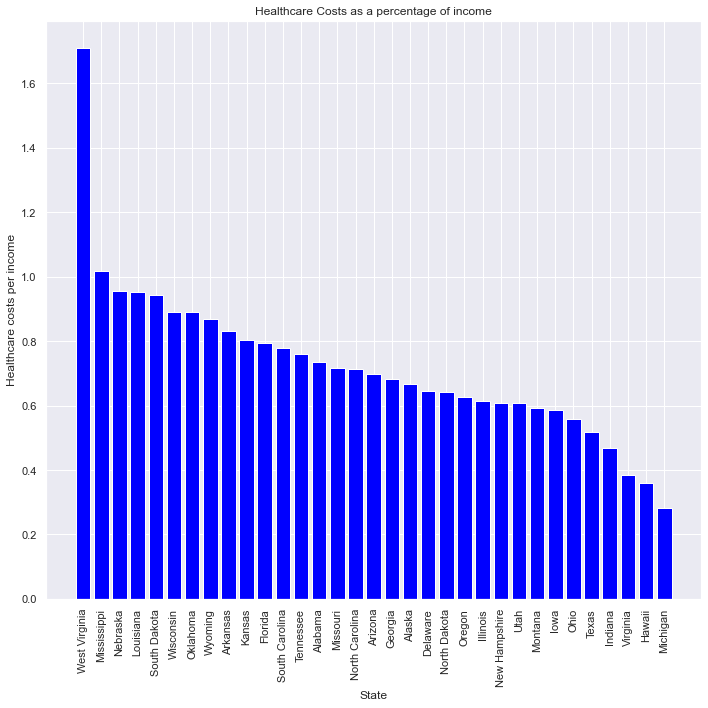

In [298]:
## Plot the data on a chart
plt.figure(figsize=(10, 10))
plt.bar(median_income_rate_state['state'], median_income_rate_state['rate_per_inc'], color='blue')
plt.xlabel('State')
plt.ylabel('Healthcare costs per income')
plt.title('Healthcare Costs as a percentage of income')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [293]:
## Print the entire table
print(median_income_rate_state)

    ind_rate_mean           state  medianHouseholdIncome2021 state_code  \
31     875.844819   West Virginia                      51248         WV   
15     496.452188     Mississippi                      48716         MS   
19     639.422923        Nebraska                      66817         NE   
12     496.683815       Louisiana                      52087         LA   
25     624.844369    South Dakota                      66143         SD   
30     596.938378       Wisconsin                      67125         WI   
22     496.357445        Oklahoma                      55826         OK   
32     566.459533         Wyoming                      65204         WY   
2      436.066916        Arkansas                      52528         AR   
11     515.731019          Kansas                      64124         KS   
5      499.965249         Florida                      63062         FL   
24     461.128034  South Carolina                      59318         SC   
26     453.391123       T

In [273]:
## Filter to determine the number of States for which the health insurance rate per income is 0.8% or greater
median_income_rate_state['rate_per_inc'] = median_income_rate_state['rate_per_inc'] > 0.8
print(median_income_rate_state)

    ind_rate_mean           state  medianHouseholdIncome2021 state_code  \
31     875.844819   West Virginia                      51248         WV   
15     496.452188     Mississippi                      48716         MS   
19     639.422923        Nebraska                      66817         NE   
12     496.683815       Louisiana                      52087         LA   
25     624.844369    South Dakota                      66143         SD   
30     596.938378       Wisconsin                      67125         WI   
22     496.357445        Oklahoma                      55826         OK   
32     566.459533         Wyoming                      65204         WY   
2      436.066916        Arkansas                      52528         AR   
11     515.731019          Kansas                      64124         KS   
5      499.965249         Florida                      63062         FL   
24     461.128034  South Carolina                      59318         SC   
26     453.391123       T

In [274]:
## Calculate the total number of States with health insurance rate per income is 0.8% or greater using count function 
count_true = median_income_rate_state.sum()

print("Number of True responses:", count_true)

Number of True responses: ind_rate_mean                                                     15240.742969
state                        West VirginiaMississippiNebraskaLouisianaSouth...
medianHouseholdIncome2021                                              2162511
state_code                   WVMSNELASDWIOKWYARKSFLSCTNALMONCAZGAAKDENDORIL...
state_name                   West VirginiaMississippiNebraskaLouisianaSouth...
rate_per_inc                                                                10
dtype: object


In [317]:
## Convert to dataframe
df = pd.DataFrame(median_income_rate_state)

# Find the ranking of West Virginia's median household income
west_virginia_income = df[df['state'] == 'West Virginia']['medianHouseholdIncome2021'].iloc[0]
ranking = df[df['medianHouseholdIncome2021'] >= west_virginia_income]['medianHouseholdIncome2021'].rank(ascending=False).iloc[0]

print(f"West Virginia's median household income is ranked #{int(ranking)} among the states.")

West Virginia's median household income is ranked #32 among the states.


In [318]:
# Find the ranking of West Virginia's median household income
west_virginia_income = df[df['state'] == 'West Virginia']['ind_rate_mean'].iloc[0]
ranking = df[df['medianHouseholdIncome2021'] >= west_virginia_income]['ind_rate_mean'].rank(ascending=False).iloc[0]

print(f"West Virginia's individual health insurance rate is ranked #{int(ranking)} among the states.")

West Virginia's individual health insurance rate is ranked #1 among the states.
